# Exploratory Data Analysis

## Prepare Data

In [1]:
##packages
import pandas as pd
import os
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# In Jupyter, __file__ is not defined. Use os.getcwd() to get the current working directory.
raw_dataPath = os.path.join( "..", "data", "raw")

In [2]:
# Load the dataset
df= pd.read_csv(raw_dataPath+"/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
#list the columns and its datatypes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [4]:
# Display the shape of the DataFrame
df.shape

(10000, 14)

In [5]:
# find duplicate rows
duplicates =df.duplicated()
duplicates_count = duplicates.sum()
print(f"Number of duplicate rows: {duplicates_count}")

Number of duplicate rows: 0


In [6]:
#missing values in each column
missingVal=df.isna().sum()
missingVal

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### there are no missing values in every column

## Data Exploration


In [7]:
# list the columns
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
# drop RowNumber Column
updatedDf=df.drop(columns=["RowNumber"])
updatedDf.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
# Numerical columns and categorical columns
numerical_columns = updatedDf.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = updatedDf.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)  


Numerical Columns: ['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
Categorical Columns: ['Surname', 'Geography', 'Gender']


In [10]:
# find the churn rate 
churn_rate=updatedDf['Exited'].value_counts()
churn_rate
# map o to not exited and 1 to exited
categorty_map = {0: 'Not Exited', 1: 'Exited'}
updatedDf['churn_category']=updatedDf['Exited'].map(categorty_map)
# drop Exited column 
updatedDf.drop(columns=['Exited'], inplace=True)



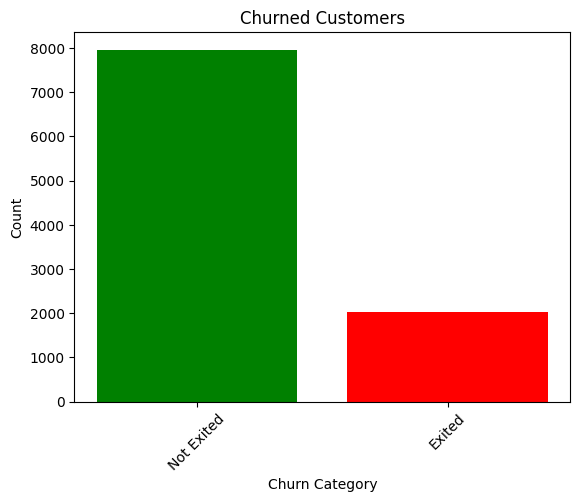

Churn Rate Percentage: 20.37%


In [11]:
#visulaise the churned customers
# plt.figure(figsize=(10,10))
churnRate=updatedDf['churn_category'].value_counts()
plt.bar(churnRate.index,churnRate.values,
        color=['green', 'red'])
plt.title('Churned Customers')
plt.xlabel('Churn Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# calculate churn rate percentage
churn_rate_percentage = (churnRate['Exited'] / churnRate.sum()) * 100
print(f"Churn Rate Percentage: {churn_rate_percentage:.2f}%")

#### churn percentage is 20.37%, so we need to look into other columns which are effecting this

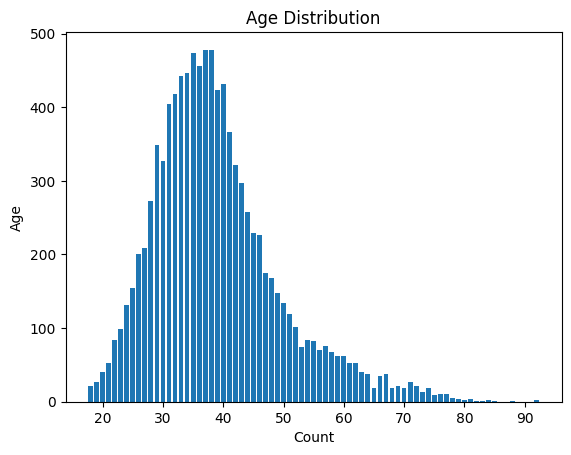

In [12]:
# we have age, credit score, balance, estimated salary, and tenure as numerical columns 
Age = updatedDf['Age'].value_counts()
plt.bar(Age.index, Age.values)
plt.title('Age Distribution')
plt.xlabel('Count')
plt.ylabel('Age')
plt.show()


### almost most of the age is in range of 30-50
### we can divide the age to bins of range 10

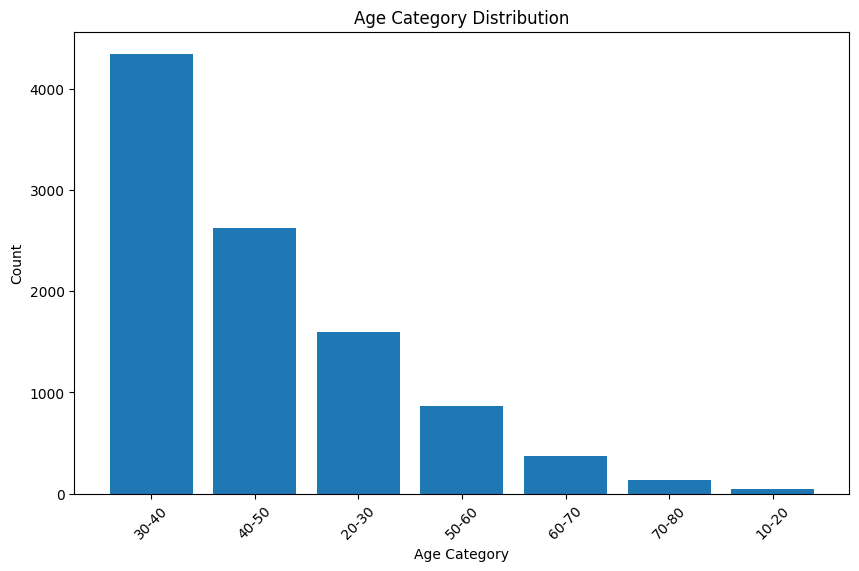

In [13]:
# map age to categories 10-20, 20-30, 30-40, 40-50, 50-60, 60-70, 70-80
bins = [10, 20, 30, 40, 50, 60, 70, 80]
labels = ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
updatedDf['Age_Category'] = pd.cut(updatedDf['Age'], bins=bins, labels=labels, right=False)
# visualize now 
plt.figure(figsize=(10, 6))
plt.bar(updatedDf['Age_Category'].value_counts().index, updatedDf['Age_Category'].value_counts().values)
plt.title('Age Category Distribution')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_114113/2815520314.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_to_churn=updatedDf.groupby(['Age_Category', 'churn_category']).size().unstack()


churn_category,Exited,Not Exited
Age_Category,,
10-20,3,46
20-30,121,1471
30-40,473,3873
40-50,806,1812
50-60,487,382
60-70,132,243
70-80,14,122


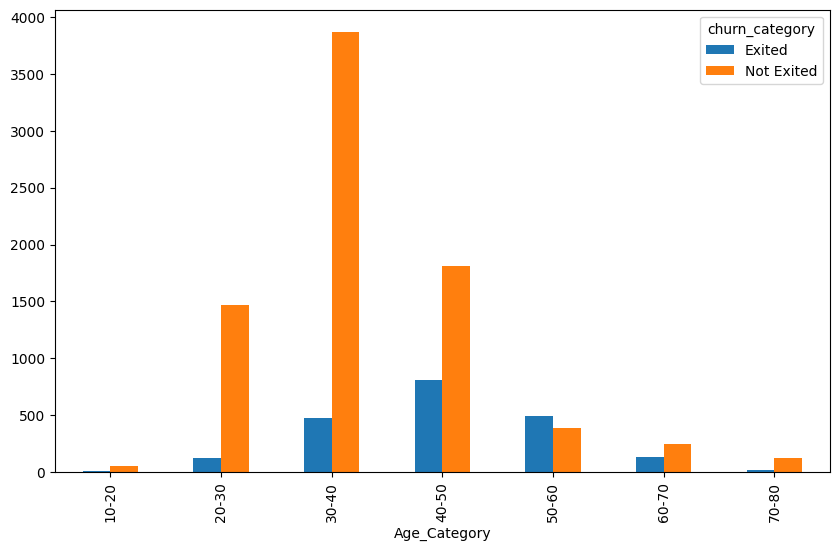

In [14]:
# AgeCategory to churn category
age_to_churn=updatedDf.groupby(['Age_Category', 'churn_category']).size().unstack()
age_to_churn.plot(kind='bar', figsize=(10, 6))
# plt.figure(figsize=(10, 6))
# plt.bar(age)
# plt.show()
age_to_churn

#### age 30-40 have mor enumber of people , but the churn rate is high among age group of 40-50

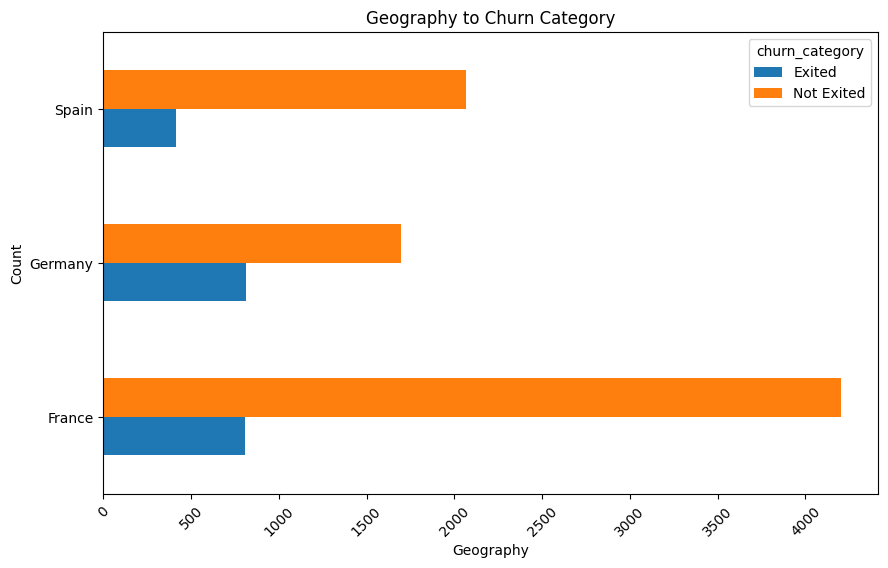

In [15]:
# lets see the geography to churn rate
geography_to_churn= updatedDf.groupby(['Geography','churn_category']).size().unstack()
geography_to_churn.plot(kind='barh', stacked=False,figsize=(10, 6))
plt.title('Geography to Churn Category')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



### germany and france have equal amount of churned customers whereas not exited customers are high in france and spain. with less  churn rate and good customers spain stand as the stable businees place, whereas france has the highest business with highest 

/tmp/ipykernel_114113/3911761182.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(churned_customers['CreditScore'], positions=[0],labels=['Churned']   )
/tmp/ipykernel_114113/3911761182.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(Non_churned_customers['CreditScore'], positions=[1],labels=['Not Churned']   )


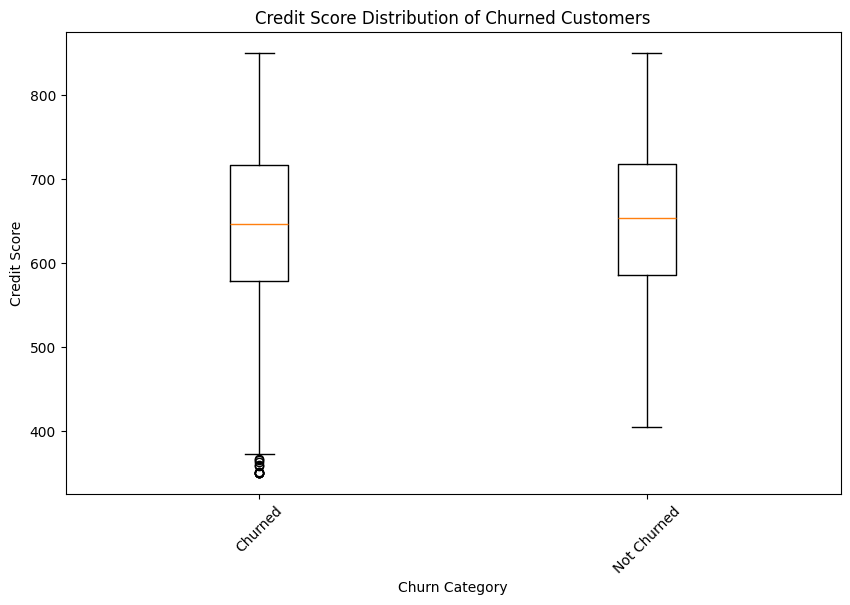

(np.float64(646.0), np.float64(653.0))

In [ ]:
# distribution of credit score of customers
churned_customers = updatedDf[updatedDf['churn_category'] == 'Exited']
Non_churned_customers = updatedDf[updatedDf['churn_category'] == 'Not Exited']
fig,ax= plt.subplots(figsize=(10, 6))
ax.boxplot(churned_customers['CreditScore'], positions=[0],labels=['Churned']   )
ax.boxplot(Non_churned_customers['CreditScore'], positions=[1],labels=['Not Churned']   )
ax.set_title('Credit Score Distribution of Churned Customers')
ax.set_xlabel('Churn Category')
ax.set_ylabel('Credit Score')
plt.xticks(rotation=45)
plt.show()
churned_customers['CreditScore'].median(), Non_churned_customers['CreditScore'].median()


In [17]:
q1=np.percentile(churned_customers['CreditScore'],25)
q3=np.percentile(churned_customers['CreditScore'],75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
outliers = churned_customers[(churned_customers['CreditScore'] < lower_bound) | (churned_customers['CreditScore'] > upper_bound)]
print(f"Number of Outliers: {len(outliers)}")
print("Outliers:")
print(outliers[['CustomerId', 'CreditScore']])

Lower Bound: 371.0, Upper Bound: 923.0
Number of Outliers: 11
Outliers:
      CustomerId  CreditScore
1193    15779947          363
1405    15612494          359
1631    15685372          350
1838    15758813          350
1962    15692416          358
2473    15679249          351
2579    15597896          365
8154    15791533          367
8723    15803202          350
8762    15765173          350
9624    15668309          350


In [18]:
updatedDf.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'churn_category', 'Age_Category'],
      dtype='object')

churn_category  Exited  Not Exited
Gender                            
Female            1139        3404
Male               898        4559


<Figure size 1000x600 with 0 Axes>

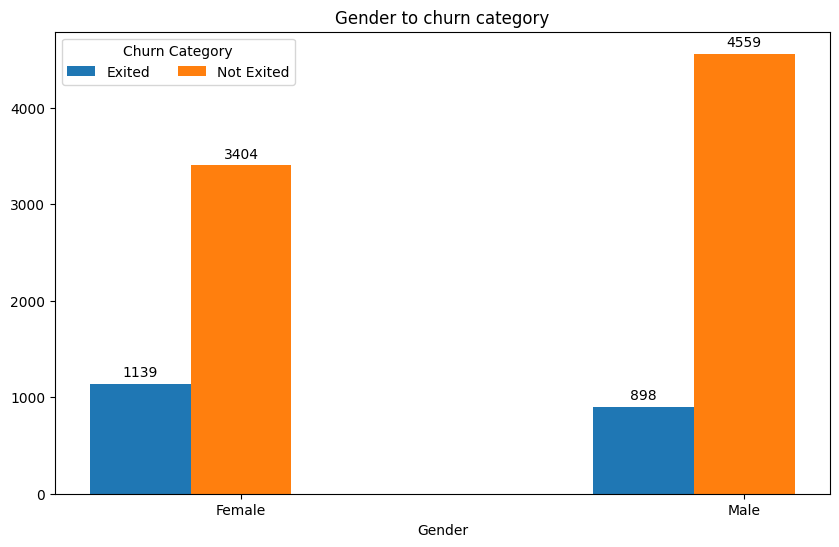

<Figure size 1000x600 with 0 Axes>

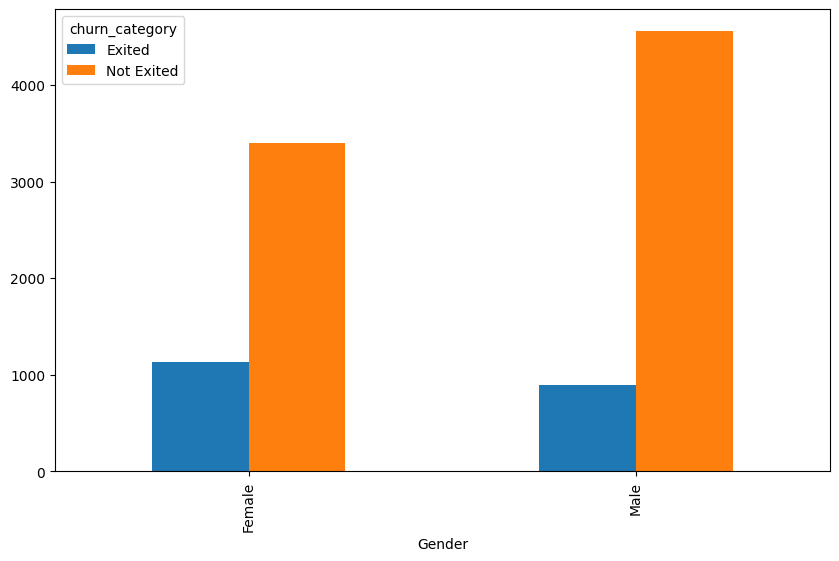

In [19]:
# gender to churn category
gender_To_churn=updatedDf.groupby(['Gender', 'churn_category'],as_index=True).size().unstack()
print(gender_To_churn)
plt.figure(figsize=(10, 6))
# plt.bar(gender_To_churn)
# Assuming gender_To_churn is already defined as per your previous code
# gender_To_churn = updatedDf.groupby(['Gender', 'churn_category'], as_index=True).size().unstack()
churnCategories=updatedDf['Gender'].unique()
churnCategoryvalues={}
for category,gendervalues in gender_To_churn.items():

    for  gender,count in gendervalues.items():
        
        if category not in churnCategoryvalues:
            churnCategoryvalues[category] = []
        churnCategoryvalues[category].append(count)
        

width = 0.20
multiplier=0
x=np.arange(churnCategories.shape[0])
fig,ax=plt.subplots(figsize=(10, 6))
for category, values in churnCategoryvalues.items():
    offset=width* multiplier
    rects=ax.bar(x+offset,values, width, label=category)
    multiplier+=1
    ax.bar_label(rects, padding=3)
ax.set_title("Gender to churn category")
ax.set_xlabel("Gender")
# ax.set_ylabel("Count")
ax.set_xticks(x + width, churnCategories)
ax.legend(ncols=len(churnCategories), title="Churn Category")
plt.show()
plt.figure(figsize=(10, 6))

gender_To_churn.plot(kind='bar', figsize=(10, 6))
plt.show()

#### mostly female customers are exitting

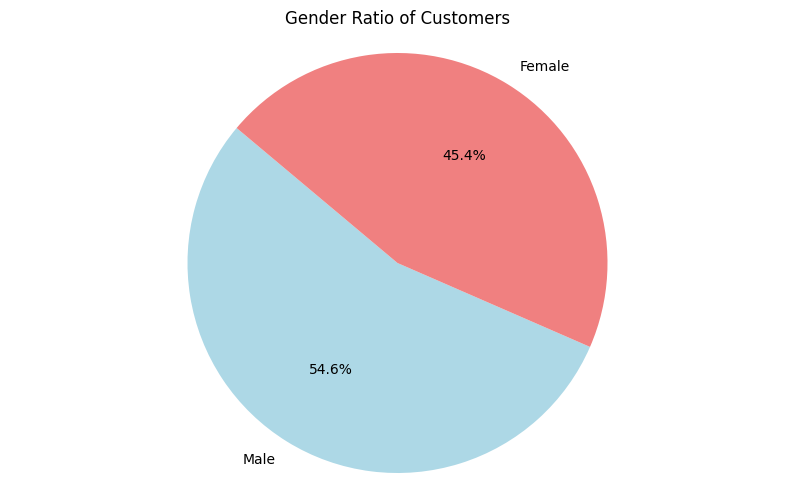

In [20]:
# female to male customers
gender_ratio=updatedDf['Gender'].value_counts()
labels=gender_ratio.index
data=gender_ratio.values
plt.figure(figsize=(10, 6))
plt.pie(data,  labels=labels,autopct='%1.1f%%',startangle=140, colors=['lightblue', 'lightcoral'])
plt.title('Gender Ratio of Customers')
plt.axis('equal')
plt.show()

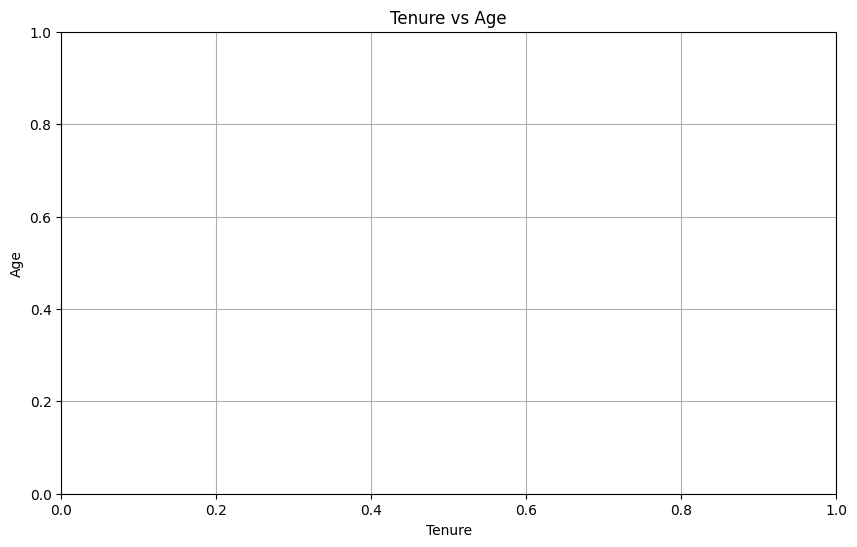

In [46]:
# tenure data
tenureAge=updatedDf.groupby(['Tenure', 'Age']).size().unstack()
plt.figure(figsize=(10, 6))
plt.xlabel('Tenure')
plt.ylabel('Age')
plt.title('Tenure vs Age')
plt.grid(True)
plt.show()


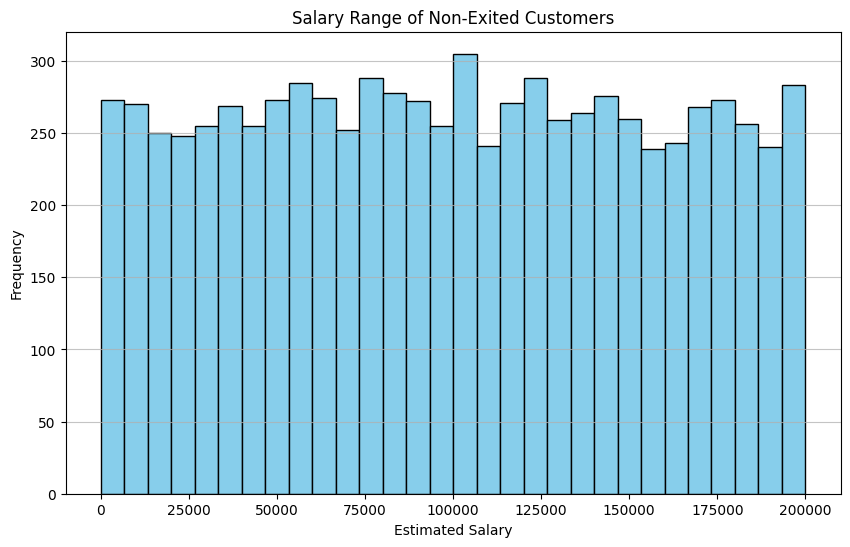

count      7963.000000
mean      99738.391772
std       57405.586966
min          90.070000
25%       50783.490000
50%       99645.040000
75%      148609.955000
max      199992.480000
Name: EstimatedSalary, dtype: float64

In [22]:
# Salary range of non exited customers
Non_exited_customers = updatedDf[updatedDf['churn_category'] == 'Not Exited']
salary_range = updatedDf[updatedDf['churn_category'] == 'Not Exited']['EstimatedSalary']
plt.figure(figsize=(10, 6))
plt.hist(salary_range, bins=30, color='skyblue', edgecolor='black')
plt.title('Salary Range of Non-Exited Customers')
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()
salary_range.describe()

Active Members' Estimated Salary Statistics:
count      4416.000000
mean      99253.061793
std       57391.253792
min          90.070000
25%       50781.767500
50%       98947.335000
75%      148182.365000
max      199953.330000
Name: EstimatedSalary, dtype: float64
Member Customers Count:
IsActiveMember
1    4416
0    3547
Name: count, dtype: int64


Text(0.5, 1.0, 'IsActiveMember to Churn Category')

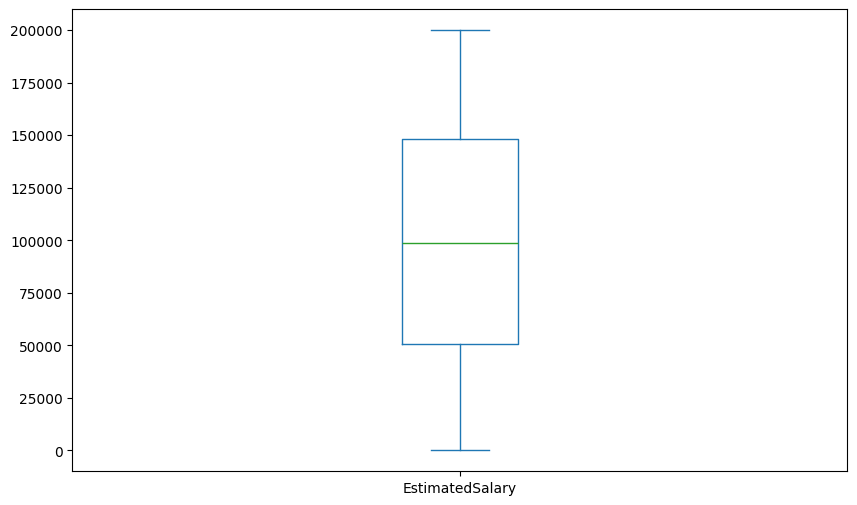

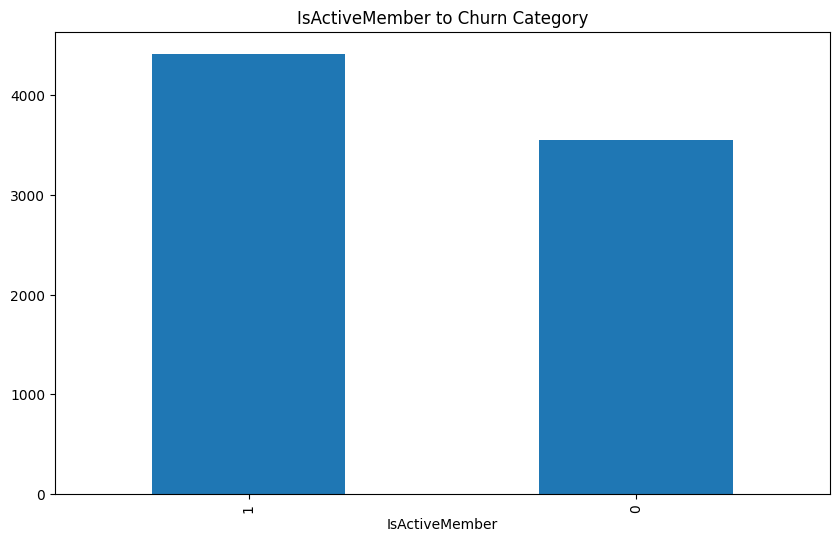

In [23]:
memberCustomers=Non_exited_customers['IsActiveMember'].value_counts()
# IsActiveMember to churn category
nonexitedMembers_salary=Non_exited_customers[Non_exited_customers['IsActiveMember']==1 ]['EstimatedSalary']
nonexitedMembers_salary.plot(kind='box', figsize=(10, 6))
print("Active Members' Estimated Salary Statistics:")
print(nonexitedMembers_salary.describe())
print("Member Customers Count:")
print(memberCustomers)
plt.figure(figsize=(10, 6))
memberCustomers.plot(kind='bar', figsize=(10, 6))
plt.title('IsActiveMember to Churn Category')

<Axes: xlabel='Tenure'>

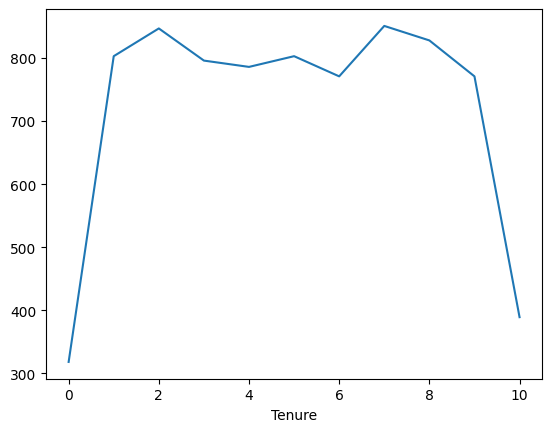

In [ ]:
Non_exited_customers.groupby('Tenure')['churn_category'].size().plot()


CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
358      1
412      1
382      1
373      1
419      1
Name: count, Length: 460, dtype: int64

## Feature Engineering



In [26]:
updatedDf.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'churn_category', 'Age_Category'],
      dtype='object')

In [29]:
updatedDf['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

#### min is 35 and max is 850

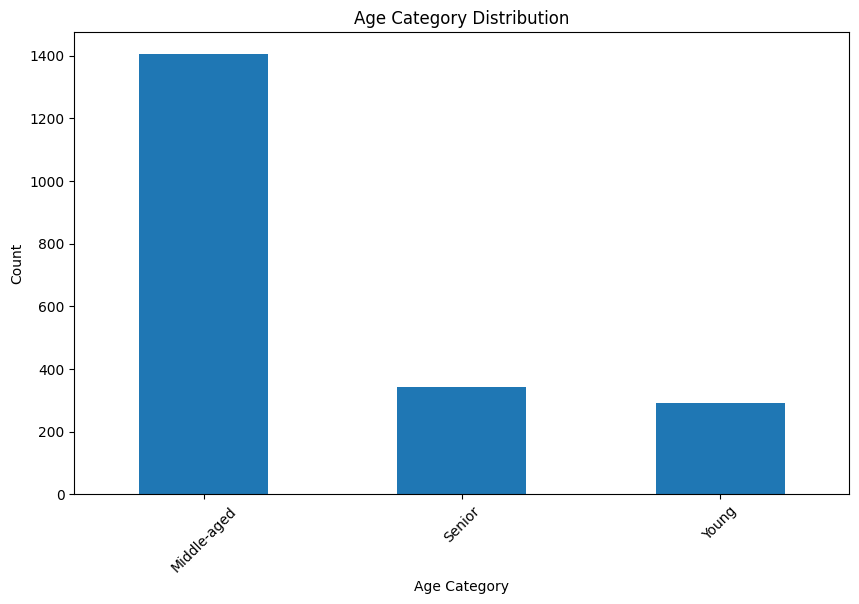

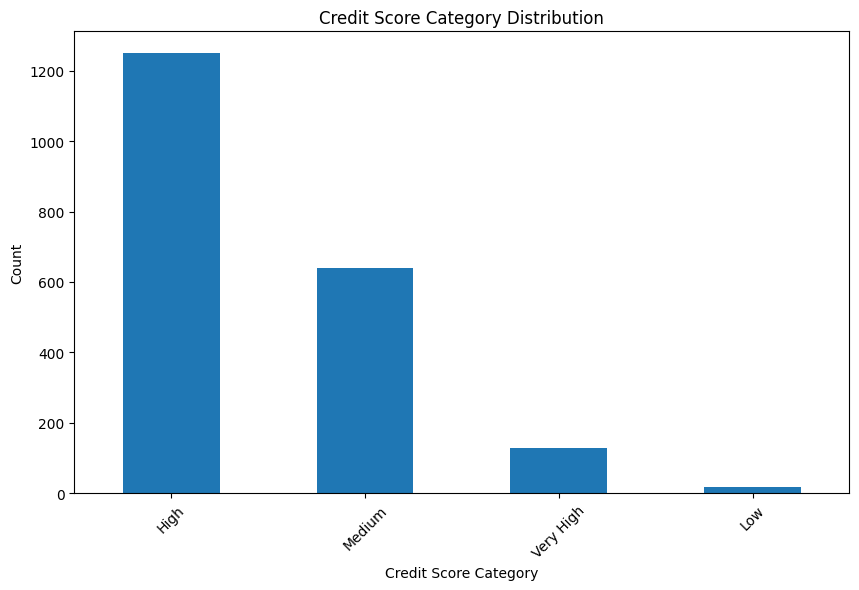

In [44]:
# categorise age to child, young, middle-aged, senior
def categorize_age(age):
    if age < 18:
        return 'Child'
    elif 18 <= age < 35:
        return 'Young'
    elif 35 <= age < 55:
        return 'Middle-aged'
    else:
        return 'Senior'
    
def CreditScoreCategory(credit_score):
    if credit_score < 400:
        return 'Low'
    elif 400 <= credit_score < 600:
        return 'Medium'
    elif 600 <= credit_score < 800:
        return 'High'
    else:
        return 'Very High'


updatedDf['Age_Category'] = updatedDf['Age'].apply(categorize_age)
updatedDf['CreditScore_Category'] = updatedDf['CreditScore'].apply(CreditScoreCategory)

updatedDf[updatedDf['churn_category'] == 'Exited']['Age_Category'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Age Category Distribution')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

updatedDf[updatedDf['churn_category'] == 'Exited']['CreditScore_Category'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Credit Score Category Distribution')
plt.xlabel('Credit Score Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
    


#### credit score -High and middle-aged people have high churn score

In [48]:
updatedDf.to_csv('../data/transformed/transformedChurnData.csv',index=False)